In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
print("Libraries Imported")

Libraries Imported


In [11]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
df.shape

(5169, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df=df.rename(columns={'v1':'TARGET','v2':'MESSAGE'})

In [17]:
df

,TARGET,MESSAGE
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
df.isnull().sum()

TARGET     0
MESSAGE    0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [22]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['TARGET']=encoder.fit_transform(df['TARGET'])

In [25]:
df

,TARGET,MESSAGE
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


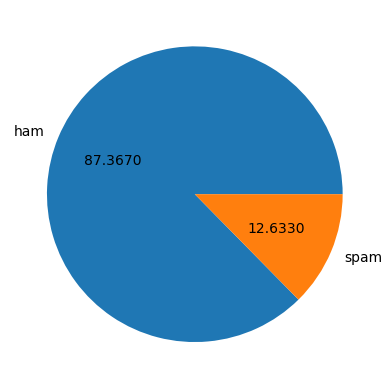

In [27]:
plt.pie(df["TARGET"].value_counts(),labels=['ham','spam'],autopct="%0.4f")
plt.show()

In [28]:
x=df['MESSAGE']
y=df['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)
print(accuracy_score(y_train,prediction_train)*100)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [34]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.fit_transform(x_test)

In [37]:
x_train_cv

<4135x7641 sparse matrix of type '<class 'numpy.int64'>'
	with 54252 stored elements in Compressed Sparse Row format>

In [46]:
x_test_cv

<1034x3388 sparse matrix of type '<class 'numpy.int64'>'
	with 13766 stored elements in Compressed Sparse Row format>

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the CountVectorizer instance to the entire dataset
cv = CountVectorizer()
x_cv = cv.fit_transform(x)

# Split the dataset 
x_train_cv, x_test_cv, y_train, y_test = train_test_split(x_cv, y, test_size=0.2, random_state=3)

# Train the LogisticRegression model
lr = LogisticRegression()
lr.fit(x_train_cv, y_train)

prediction_train=lr.predict(x_train_cv)
print("Accuracy on trained data :",accuracy_score(y_train,prediction_train)*100)

prediction_test=lr.predict(x_test_cv)
print("Accuracy on test data :",accuracy_score(y_test,prediction_test)*100)

Accuracy on trained data : 99.75816203143893
Accuracy on test data : 97.58220502901354


In [80]:
# Make a prediction on the new input
new_input = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
new_input_cv = cv.transform([new_input])
prediction_new = lr.predict(new_input_cv)
if(prediction_new==1):
    print("SPAM")
else:
    print("LEGITIMATE")

SPAM


In [81]:
new_input = "Yes I started to send requests to make it but pain came back so I'm back in bed. Double coins at the factory too. I gotta cash in all my nitros."
new_input_cv = cv.transform([new_input])
prediction_new = lr.predict(new_input_cv)
if(prediction_new==1):
    print("SPAM")
else:
    print("LEGITIMATE")

LEGITIMATE
